# Preliminar analysis eye data 
- Eye data automatically collected through Varjo interface. 
- Participant followed a Nikolaus house shaped image displayed on the VR environment

## Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV-Datei laden
df = pd.read_csv("C:/Users/experiment/Desktop/Nikolaus_heatmap_data/left_eye_only/varjo_gaze_output_2025-04-30_14-14-41-647.csv")

In [2]:
# Gültige Daten: NaNs entfernen
df = df.dropna(subset=[
    "gaze_projected_to_left_view_x", "gaze_projected_to_right_view_x",
    "gaze_projected_to_left_view_y", "gaze_projected_to_right_view_y"
])

df["gaze_projected_to_left_view_y"] = pd.to_numeric(df["gaze_projected_to_left_view_y"], errors="coerce")
df["gaze_projected_to_right_view_y"] = pd.to_numeric(df["gaze_projected_to_right_view_y"], errors="coerce")

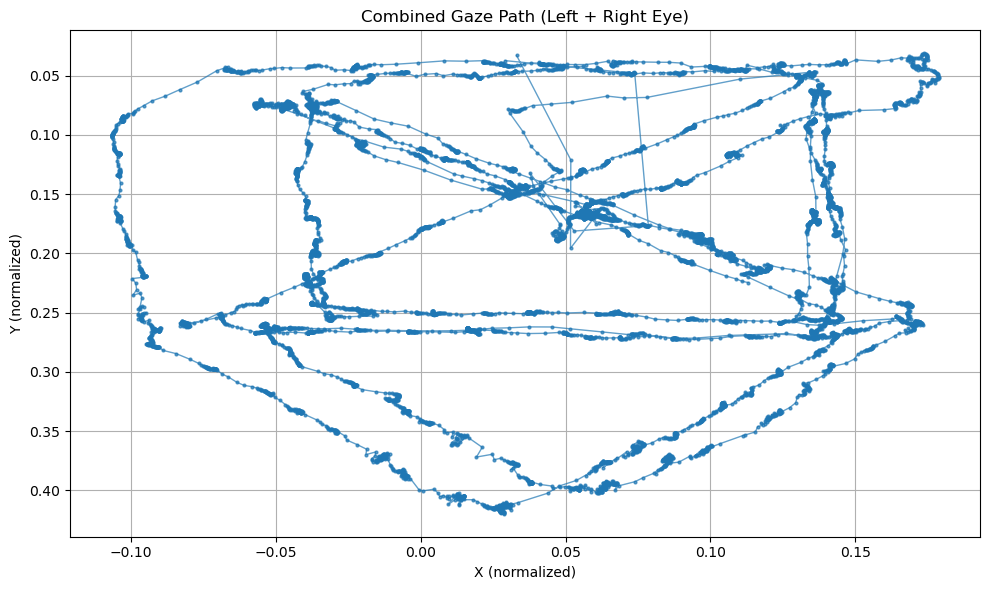

In [3]:
# Kombinierte (gemittelte) Gaze-Position berechnen
df["gaze_x_avg"] = (df["gaze_projected_to_left_view_x"] + df["gaze_projected_to_right_view_x"]) / 2
df["gaze_y_avg"] = (df["gaze_projected_to_left_view_y"] + df["gaze_projected_to_right_view_y"]) / 2

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(df["gaze_x_avg"], df["gaze_y_avg"], marker='o', markersize=2, linewidth=1, alpha=0.7)
plt.title("Combined Gaze Path (Left + Right Eye)")
plt.xlabel("X (normalized)")
plt.ylabel("Y (normalized)")
plt.gca().invert_yaxis()  # 0,0 oben links wie auf einem Screen
plt.grid(True)
plt.tight_layout()
plt.show()
